In [12]:
import numpy as np 
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image 

In [13]:
data = pd.read_csv("data/dataset_einstein.csv", sep=";")

In [15]:
data.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,Patient addmited to regular ward (1=yes. 0=no),Patient addmited to semi-intensive unit (1=yes. 0=no),Patient addmited to intensive care unit (1=yes. 0=no),Hemoglobin,Leukocytes,Basophils,Proteina C reativa mg/dL,Creatinine
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,-0.02234,-0.09461,-0.223767,-0.147895,2.089928
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN


In [18]:
data.shape

(5644, 11)

In [19]:
data = data.dropna()

In [21]:
data.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,Patient addmited to regular ward (1=yes. 0=no),Patient addmited to semi-intensive unit (1=yes. 0=no),Patient addmited to intensive care unit (1=yes. 0=no),Hemoglobin,Leukocytes,Basophils,Proteina C reativa mg/dL,Creatinine
1,126e9dd13932f68,17,negative,0,0,0,-0.022340,-0.094610,-0.223767,-0.147895,2.089928
8,8bb9d64f0215244,1,negative,0,1,0,-0.774212,0.364550,-0.223767,-0.286986,-1.838623
28,fc41531ca4faf1e,13,negative,0,0,0,0.854844,-0.075131,2.525365,-0.434025,-0.701411
29,891d0f6449ff3d7,14,negative,0,0,0,0.854844,0.105751,-0.529226,-0.529401,0.332418
30,ebdd7c67fcb21b4,9,negative,1,0,0,-0.711556,-0.286623,-0.223767,0.545572,1.021638


In [22]:
data.shape

(357, 11)

In [28]:
# data[data['SARS-Cov-2 exam result'] == 'negative'].count()

In [29]:
Y = data['SARS-Cov-2 exam result'].values
X = data[['Hemoglobin', 'Leukocytes', 'Basophils', 'Proteina C reativa mg/dL']].values

In [30]:
X

array([[-0.02234027, -0.09461035, -0.22376651, -0.14789495],
       [-0.774212  ,  0.36455047, -0.22376651, -0.28698576],
       [ 0.85484386, -0.07513076,  2.52536511, -0.4340246 ],
       ...,
       [ 1.10546756, -0.5509882 , -0.22376651,  0.5614683 ],
       [-2.77920342, -1.73367476, -1.14014375,  0.60915661],
       [ 0.54156393, -1.28842807, -1.14014375, -0.50357002]])

In [32]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2, random_state=3, stratify=Y)

In [33]:
algortimo_arvore = DecisionTreeClassifier(criterion='entropy', max_depth=5)

modelo = algortimo_arvore.fit(X_treino, Y_treino)

[0.09031164 0.61762771 0.1004826  0.19157804]


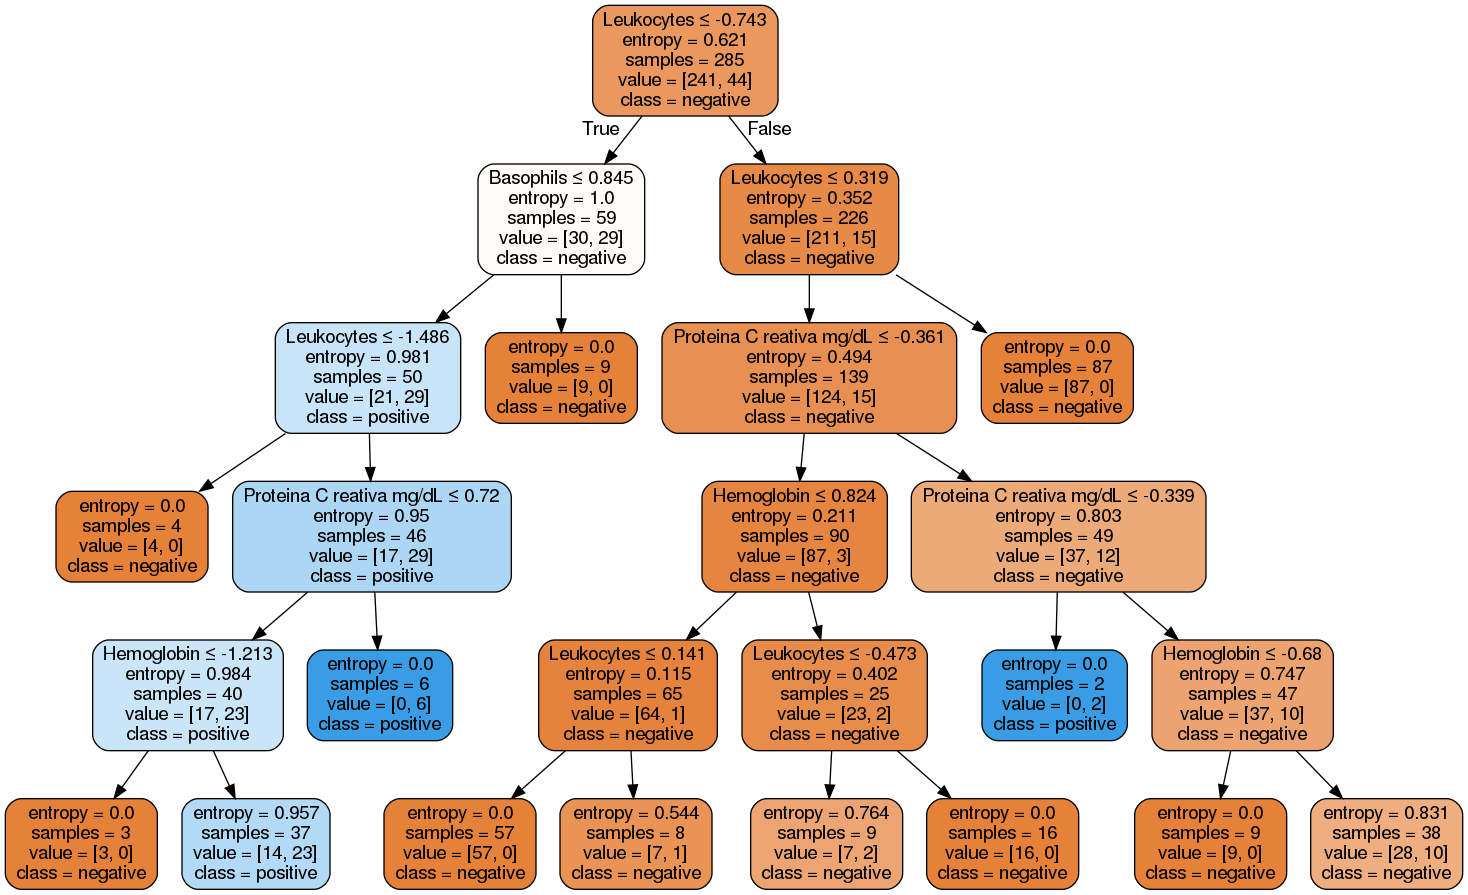

In [40]:
print (modelo.feature_importances_)

nome_features = ['Hemoglobin', 'Leukocytes', 'Basophils','Proteina C reativa mg/dL']
nome_classes = modelo.classes_


dot_data = StringIO()

export_graphviz(modelo, out_file=dot_data, filled=True, feature_names=nome_features, class_names=nome_classes, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
graph.write_png("arvore.png")
Image('arvore.png')


Feature ranking:
1. feature 1 (0.617628)
2. feature 3 (0.191578)
3. feature 2 (0.100483)
4. feature 0 (0.090312)


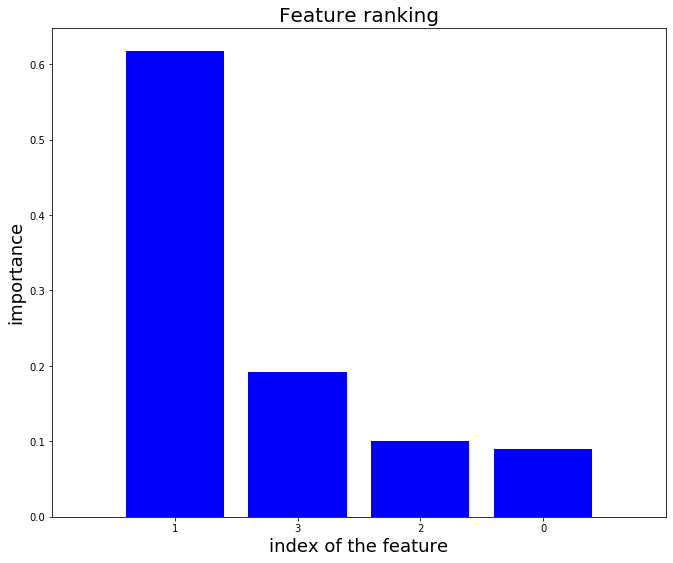

In [41]:
importances = modelo.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
f, ax = plt.subplots(figsize=(11, 9))
plt.title("Feature ranking", fontsize = 20)
plt.bar(range(X.shape[1]), importances[indices],
    color="b", 
    align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.ylabel("importance", fontsize = 18)
plt.xlabel("index of the feature", fontsize = 18)
plt.show()


In [42]:
Y_predicoes = modelo.predict(X_teste)

print("ACURÁCIA DA ÁRVORE: ", accuracy_score(Y_teste, Y_predicoes))
print (classification_report(Y_teste, Y_predicoes))

ACURÁCIA DA ÁRVORE:  0.8333333333333334
              precision    recall  f1-score   support

    negative       0.89      0.92      0.90        61
    positive       0.44      0.36      0.40        11

    accuracy                           0.83        72
   macro avg       0.67      0.64      0.65        72
weighted avg       0.82      0.83      0.83        72

